# Cats and Dogs

In [0]:
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Method 2: download 12s
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

--2019-10-28 08:23:47--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.94.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.94.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  65.6MB/s    in 7.6s    

2019-10-28 08:23:54 (72.5 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



## Data Preparation

In [0]:
import numpy as np
import os
import shutil
from os import listdir
from os.path import isfile, join

In [0]:
train_val_split = len(os.listdir("Cat_Dog_data/train/cat")) // 4
train_val_split

2812

In [0]:
try:
  os.mkdir(os.path.join("Cat_Dog_data", 'validation'))
except Exception:
  pass
try:
  os.mkdir(os.path.join("Cat_Dog_data", 'validation/cat'))
except Exception:
  pass
try:
  os.mkdir(os.path.join("Cat_Dog_data", 'validation/dog'))
except Exception:
  pass
# Print directory structure
!find $"Cat_Dog_data" -type d -print

Cat_Dog_data
Cat_Dog_data/train
Cat_Dog_data/train/cat
Cat_Dog_data/train/dog
Cat_Dog_data/validation
Cat_Dog_data/validation/cat
Cat_Dog_data/validation/dog
Cat_Dog_data/test
Cat_Dog_data/test/cat
Cat_Dog_data/test/dog


In [0]:
# list all files in the cat directory 
onlyfiles = [f for f in listdir("Cat_Dog_data/train/cat") if isfile(join("Cat_Dog_data/train/cat", f))]
print(len(onlyfiles))
onlyfiles[:10]

11250


['cat.7482.jpg',
 'cat.5132.jpg',
 'cat.3502.jpg',
 'cat.251.jpg',
 'cat.9148.jpg',
 'cat.1840.jpg',
 'cat.10140.jpg',
 'cat.5984.jpg',
 'cat.11014.jpg',
 'cat.11347.jpg']

In [0]:
# copy the first 1/4 to validation
for f in onlyfiles[:train_val_split]:
  shutil.move(os.path.join("Cat_Dog_data/train/cat", f), 'Cat_Dog_data/validation/cat')

In [0]:
# list all files in the cat directory 
onlyfiles = [f for f in listdir("Cat_Dog_data/train/dog") if isfile(join("Cat_Dog_data/train/dog", f))]
print(len(onlyfiles))
onlyfiles[:10]

11250


['dog.5104.jpg',
 'dog.115.jpg',
 'dog.4794.jpg',
 'dog.4744.jpg',
 'dog.7050.jpg',
 'dog.1912.jpg',
 'dog.173.jpg',
 'dog.10739.jpg',
 'dog.7745.jpg',
 'dog.3436.jpg']

In [0]:
# copy the first 1/4 to validation
for f in onlyfiles[:train_val_split]:
  shutil.move(os.path.join("Cat_Dog_data/train/dog", f), 'Cat_Dog_data/validation/dog')

In [0]:
print("# cat val", len(os.listdir("Cat_Dog_data/validation/cat")))
print("# cat train", len(os.listdir("Cat_Dog_data/train/cat")))
print("# dog val", len(os.listdir("Cat_Dog_data/validation/dog")))
print("# dog train", len(os.listdir("Cat_Dog_data/train/dog")))

# cat val 2812
# cat train 8438
# dog val 2812
# dog train 8438


In [0]:
base_dir = "Cat_Dog_data"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cat')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dog')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cat')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dog')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

rows = 128
cols= 128

# Data Pre-processing

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(rows, cols, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

x_train_datagen = ImageDataGenerator(rescale=1./255)
x_val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = x_train_datagen.flow_from_directory("Cat_Dog_data/train",
                                                    target_size=(rows,cols),
                                                    batch_size=40,
                                                    class_mode='binary')
val_datagen = x_val_datagen.flow_from_directory("Cat_Dog_data/validation",
                                                target_size=(rows,cols),
                                                batch_size=40,
                                                class_mode='binary')

Found 16876 images belonging to 2 classes.
Found 5624 images belonging to 2 classes.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

x_train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,)
x_val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = x_train_datagen.flow_from_directory("Cat_Dog_data/train",
                                                    target_size=(rows,cols),
                                                    batch_size=40,
                                                    class_mode='binary')
val_datagen = x_val_datagen.flow_from_directory("Cat_Dog_data/validation",
                                                target_size=(rows,cols),
                                                batch_size=40,
                                                class_mode='binary')

Found 16876 images belonging to 2 classes.
Found 5624 images belonging to 2 classes.


In [0]:
epochs = 10

H = model.fit_generator(train_datagen,
                        steps_per_epoch=100, 
                        epochs=epochs,
                        validation_data=val_datagen,
                        validation_steps=50)

Epoch 1/10
100/100 [==============================] - 185s 2s/step - loss: 0.6890 - acc: 0.5360 - val_loss: 0.6758 - val_acc: 0.5375
Epoch 2/10
100/100 [==============================] - 186s 2s/step - loss: 0.6688 - acc: 0.6003 - val_loss: 0.6593 - val_acc: 0.5825
Epoch 3/10
100/100 [==============================] - 182s 2s/step - loss: 0.6551 - acc: 0.6018 - val_loss: 0.6266 - val_acc: 0.6345
Epoch 4/10
100/100 [==============================] - 182s 2s/step - loss: 0.6445 - acc: 0.6137 - val_loss: 0.6025 - val_acc: 0.6675
Epoch 5/10
100/100 [==============================] - 182s 2s/step - loss: 0.6311 - acc: 0.6355 - val_loss: 0.5860 - val_acc: 0.6865
Epoch 6/10
100/100 [==============================] - 182s 2s/step - loss: 0.6312 - acc: 0.6439 - val_loss: 0.6252 - val_acc: 0.6240
Epoch 7/10
100/100 [==============================] - 181s 2s/step - loss: 0.6118 - acc: 0.6532 - val_loss: 0.5824 - val_acc: 0.6780
Epoch 8/10
100/100 [==============================] - 182s 2s/step - 

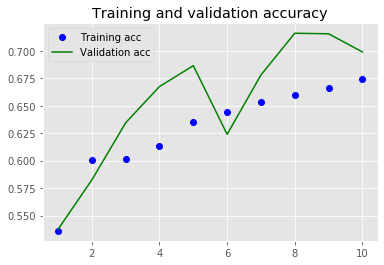

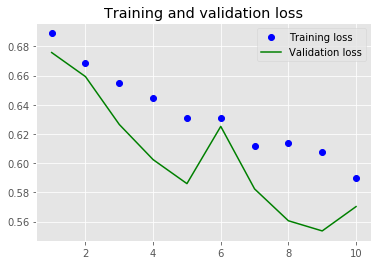

In [0]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

References:

1. [Anthony Tanbakuchi](http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/ )







